<font size=7> Raw Data ?Posterior? CA1 <font color="magenta">No Drug

Here I create a raw datasets for the ?Posterior? CA1 dataset recording without drugs. I follow the tutorial `raw_data/1_processing_raw_data.ipynb` in order to create the raw dataset

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
import pickle

import braingeneers.data.datasets_electrophysiology as ephys
from human_hip.spike_data import read_phy_files, raster_fancy_plot

In [2]:
# Metadata for selecting different section of data to load
metadata = ephys.load_metadata("2023-05-10-e-hc52_18790_unperturbed")
#metadata['ephys_experiments']["experiment1"]

## <font color="blue"> Look at Spike Data

In [5]:
sd = read_phy_files('/workspaces/human_hippocampus/data/ephys/2023-05-10-e-hc52_18790_unperturbed/derived/kilosort2/hc5.2_chip18790_baseline_rec5.10.23_curated_s1.zip')


KeyboardInterrupt: 

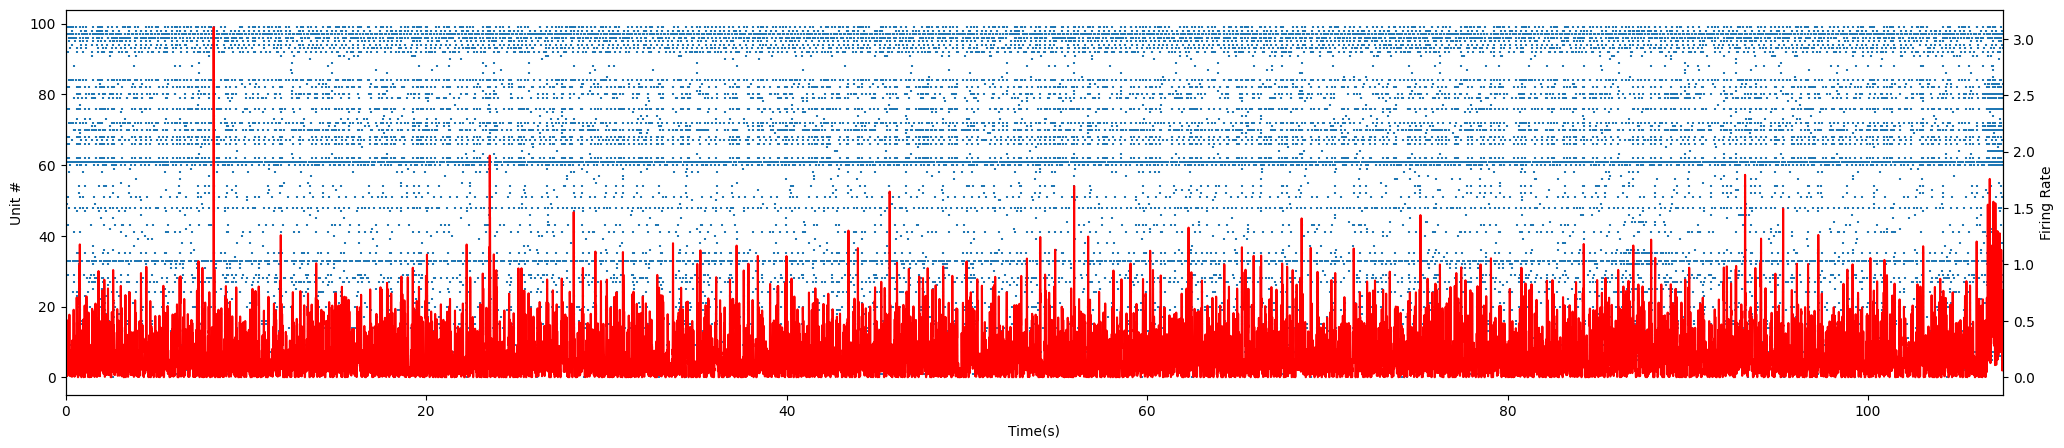

In [ ]:
raster_fancy_plot(sd, xsize=25, ysize=5)

**45-60 seconds**

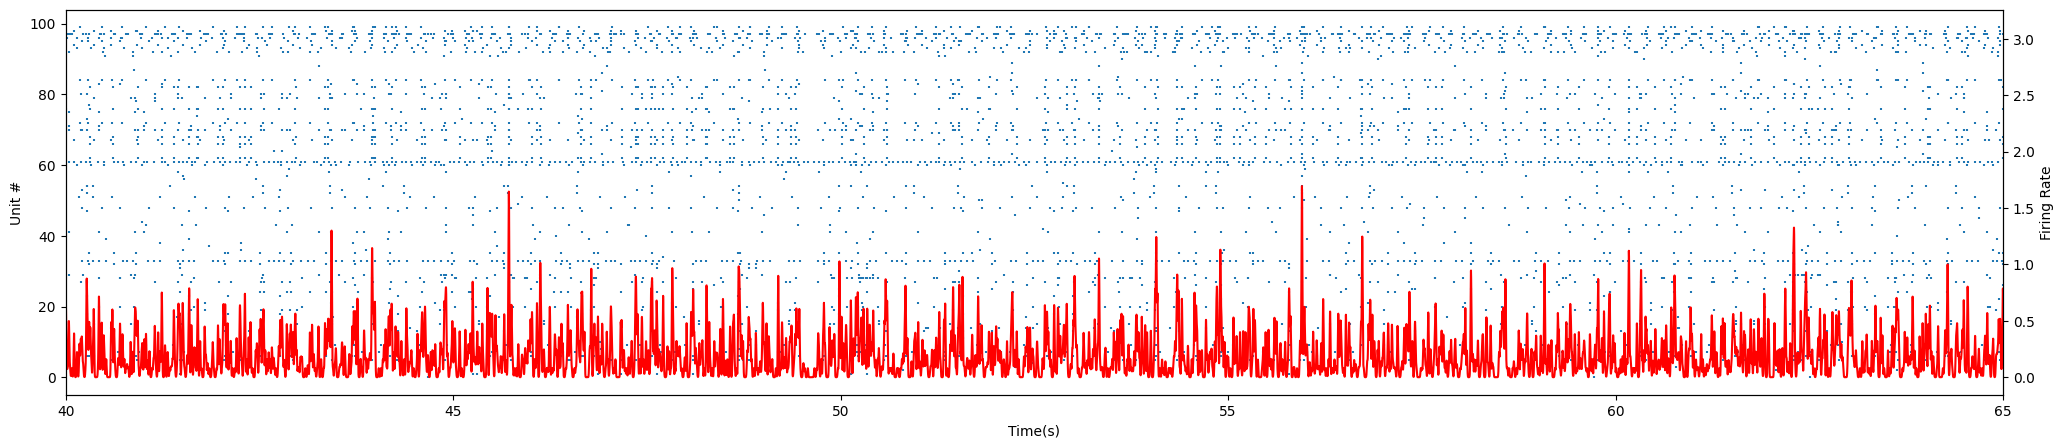

In [14]:
raster_fancy_plot(sd, xsize=25, ysize=5, start_time=40, stop_time=65 )

**0-20 seconds**

# <font color="blue">50-60 seconds

get raw data

In [4]:
raw_data = ephys.load_data( metadata=metadata, experiment="experiment1", offset=50*20000, length=10*20000, channels=None )

/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:209: UserWarning: Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.
  warnings.warn('Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.')


In [4]:
# metadata['ephys_experiments']['experiment1'] find which experiment relates to the file we want 
raw_data.shape # check data loaded correctly

(1028, 300000)

get channel x/y mapping for electrodes

In [5]:
channel_map = np.array( metadata['ephys_experiments']['experiment1']["mapping"] )

#print( "shape:", channel_map.shape )
#print( "channel_id , ", "x , ", "y , ", "?")
#print( channel_map[0:4,:] )
#plt.scatter(channel_map[:,1], channel_map[:,2] ) # make a scatterplot of the first and seconds columns of channel_map


down sampel data

In [6]:

data_down = []  # the variable that will hold the downsambled data
for i in channel_map[:,0].astype(int) : # we gather data for ever channel that was recorded from, (these channels are in the channel map of the metadata)
    data_down.append( signal.decimate( raw_data[i,:], 20 )  ) # we get everyt 20th data point, andthen append it to the data_down variable
data_down = np.array( data_down ) # we turn the data into an np.array for easier future analysis

save dataset

In [7]:
to_pickle = {"data": data_down, "xy": channel_map[:,1:3], "frame_rate": 20000/20, "start_time": 50, "stop_time": 60, 
             "file":"hc5.2_chip18790_baseline_rec5.10.23.raw.h5", "UUID":"2023-05-10-e-hc52_18790_unperturbed"}

In [8]:
# with open( '/workspaces/human_hippocampus/data/ephys_raw/2023-05-10-e-hc52_18790_unperturbed/raw_start50s_stop60s_fs1ms.pkl' , 'wb') as file:
#     pickle.dump(to_pickle, file)

check data loads correctly

In [9]:
a_file = open('/workspaces/human_hippocampus/data/ephys_raw/2023-05-10-e-hc52_18790_unperturbed/raw_start50s_stop60s_fs1ms.pkl', 'rb')
checkit = pickle.load(a_file)
a_file.close()
print(checkit["data"].shape)
checkit

(1017, 10000)


{'data': array([[508.90744, 508.5832 , 507.8832 , ..., 500.4823 , 499.98636,
         500.22818],
        [509.08414, 506.59586, 507.4406 , ..., 503.58752, 503.56332,
         504.20654],
        [495.2137 , 494.8831 , 494.5454 , ..., 495.02084, 495.17776,
         494.96616],
        ...,
        [503.27695, 504.18143, 505.07352, ..., 501.71   , 501.09543,
         500.83398],
        [533.06976, 531.3241 , 530.6038 , ..., 520.41174, 521.9924 ,
         522.80273],
        [510.9505 , 512.3901 , 513.2307 , ..., 509.02072, 509.27335,
         509.38217]], dtype=float32),
 'xy': array([[ 5857. ,  2397.5],
        [12975. ,  3762.5],
        [11532. ,  1610. ],
        ...,
        [ 5425. ,  2537.5],
        [ 5893. ,  3027.5],
        [10297. ,  3097.5]]),
 'frame_rate': 1000.0,
 'start_time': 50,
 'stop_time': 60,
 'file': 'hc5.2_chip18790_baseline_rec5.10.23.raw.h5',
 'UUID': '2023-05-10-e-hc52_18790_unperturbed'}

# <font color="blue">0-20 Seconds

# OLD

In [ ]:
hc5.2_chip18790_baseline_rec5.10.23.raw.h5

aws --endpoint https://s3.braingeneers.gi.ucsc.edu s3 ls s3://braingeneers/ephys/2023-05-10-e-hc52_18790_unperturbed/



In [ ]:
hc5.2_chip18790_baseline_rec5.10.23.raw.h5